<a href="https://colab.research.google.com/github/viditkhemka63/Machine-learning-journey/blob/master/Stock_price_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HistoricalQuotes (2).csv to HistoricalQuotes (2).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stock_data = pd.read_csv('HistoricalQuotes (2).csv')
stock_data.head()

,date,close,volume,open,high,low
0,2019/06/14,1085.35,1111643.0,1086.42,1092.69,1080.1721
1,2019/06/13,1088.77,1058000.0,1083.64,1094.17,1080.1500
2,2019/06/12,1077.03,1061255.0,1078.00,1080.93,1067.5400
3,2019/06/11,1078.72,1437063.0,1093.98,1101.99,1077.6025
4,2019/06/10,1080.38,1464248.0,1072.98,1092.66,1072.3216


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
date      1259 non-null object
close     1259 non-null float64
volume    1259 non-null float64
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [6]:
stock_data.describe()

,close,volume,open,high,low
count,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000
mean,840.252954,1.743789e+06,840.135411,847.263777,832.695712
std,224.487865,8.570756e+05,224.217233,226.572998,222.076207
min,492.550000,5.272230e+05,494.650000,495.976000,487.560000
25%,641.915000,1.229003e+06,639.890000,645.684500,632.200000
50%,791.550000,1.524783e+06,792.360000,796.860000,787.100000
75%,1049.260000,1.985548e+06,1050.085000,1062.060000,1038.410000
max,1287.580000,1.115350e+07,1274.000000,1289.270000,1266.294900


In [7]:
import math

stock_data['average'] = ( stock_data['high'] + stock_data['low'])/2
stock_data.head()

,date,close,volume,open,high,low,average
0,2019/06/14,1085.35,1111643.0,1086.42,1092.69,1080.1721,1086.43105
1,2019/06/13,1088.77,1058000.0,1083.64,1094.17,1080.1500,1087.16000
2,2019/06/12,1077.03,1061255.0,1078.00,1080.93,1067.5400,1074.23500
3,2019/06/11,1078.72,1437063.0,1093.98,1101.99,1077.6025,1089.79625
4,2019/06/10,1080.38,1464248.0,1072.98,1092.66,1072.3216,1082.49080


In [0]:
input_feature = stock_data.iloc[:, [2,6]].values
input_data = input_feature

In [10]:
print( input_feature[:,0] )

[1111643. 1058000. 1061255. ... 1734731. 1440535. 1697866.]


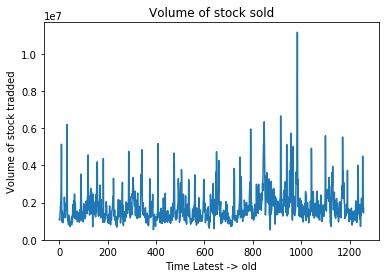

In [9]:
plt.plot(input_feature[:,0])
plt.title('Volume of stock sold')
plt.xlabel('Time Latest -> old')
plt.ylabel('Volume of stock tradded')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


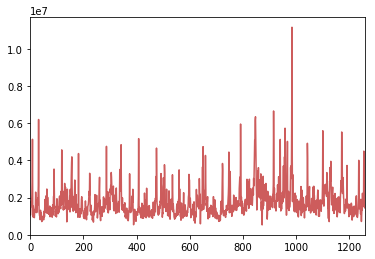

In [13]:
import seaborn as sns
sns.tsplot(input_feature[:,0] ,color="indianred")

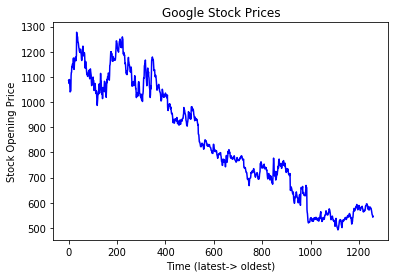

In [14]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

In [0]:
lookback= 50

test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [17]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(1208, 50, 2)
(427, 50, 2)


In [20]:
!pip install tensorflow

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [23]:
model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))

model.summary()

W0616 17:32:05.783452 140376562694016 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 30)            3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(X,y,epochs=200, batch_size=32)

W0616 17:35:07.429735 140376562694016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
1208/1208 [==============================] - 5s 4ms/sample - loss: 0.0459
Epoch 2/200
1208/1208 [==============================] - 4s 3ms/sample - loss: 0.0020
Epoch 3/200
1208/1208 [==============================] - 3s 3ms/sample - loss: 0.0018
Epoch 4/200
1208/1208 [==============================] - 3s 3ms/sample - loss: 0.0016
Epoch 5/200
1208/1208 [==============================] - 3s 3ms/sample - loss: 0.0015
Epoch 6/200
1208/1208 [==============================] - 3s 3ms/sample - loss: 0.0015
Epoch 7/200
1208/1208 [==============================] - 3s 3ms/sample - loss: 0.0015
Epoch 8/200
1208/1208 [==============================] - 3s 3ms/sample - loss: 0.0015
Epoch 9/200
1208/1208 [==============================] - 3s 3ms/sample - loss: 0.0014
Epoch 10/200
1208/1208 [==============================] - 3s 3ms/sample - loss: 0.0014
Epoch 11/200
1208/1208 [==============================] - 4s 3ms/sample - loss: 0.0015
Epoch 12/200
1208/1208 [============================

In [0]:
predicted_value = model.predict(X_test)

In [40]:
import tensorflow as tf
acc, acc_op  = tf.metrics.accuracy(labels=input_data[lookback:test_size+(2*lookback),1], predictions=predicted_value)
print(acc, acc_op)

Tensor("accuracy_4/value:0", shape=(), dtype=float32) Tensor("accuracy_4/update_op:0", shape=(), dtype=float32)


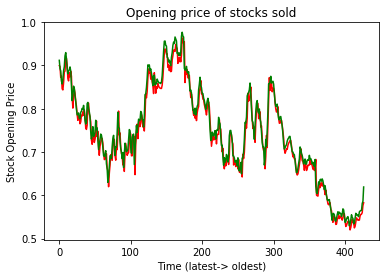

In [35]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Opening price of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()